In [1]:
import numpy as np
import pandas as pd
from collections import defaultdict, Counter
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy.spatial import distance
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from random import randrange

# Pocket Perceptron

In [2]:
def PocketPerceptron(features, target, numb_iter):
    w=np.ones([features.shape[1],1])*0.0001
    best_w = np.ones([features.shape[1],1])
    best_acc = 0
    acc=[]
    predicted= np.sign(np.dot(features, w))
    ind=[]
    iteration=1
    for iteration in range(numb_iter):
        for i in range(len(target)):
             if(predicted[i]!=target[i]):
                ind.append(i)
        index = randrange(len(ind))
        w = w + (1e-6)*(target[index] * features[index,:]).reshape(w.shape)
        predicted = np.sign(np.dot(features, w))
        accuracy = accuracy_score(predicted, target)
        acc.append(accuracy)
        if not best_acc or accuracy > best_acc:
            best_acc= accuracy
            best_w=np.copy(w)
        ind=[]
        iteration+=1
    return best_acc, best_w

In [3]:
def line(x, w0, w1, w2):
    return (-w1*x - w0)/w2

In [4]:
data = pd.read_csv('blobs2.csv')
data.label = data.label.map(lambda y: y if y == 1 else -1)
X = data[data.columns.difference(['label'])].values
y= data.label.values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_=np.ones((X_train.shape[0], 3))
for i in range(X_train.shape[0]):
    X_train_[i,0]=X_train[i,0]
    X_train_[i,1]=X_train[i,1]
X_test_=np.ones((X_test.shape[0], 3))
for i in range(X_test.shape[0]):
    X_test_[i,0]=X_test[i,0]
    X_test_[i,1]=X_test[i,1]

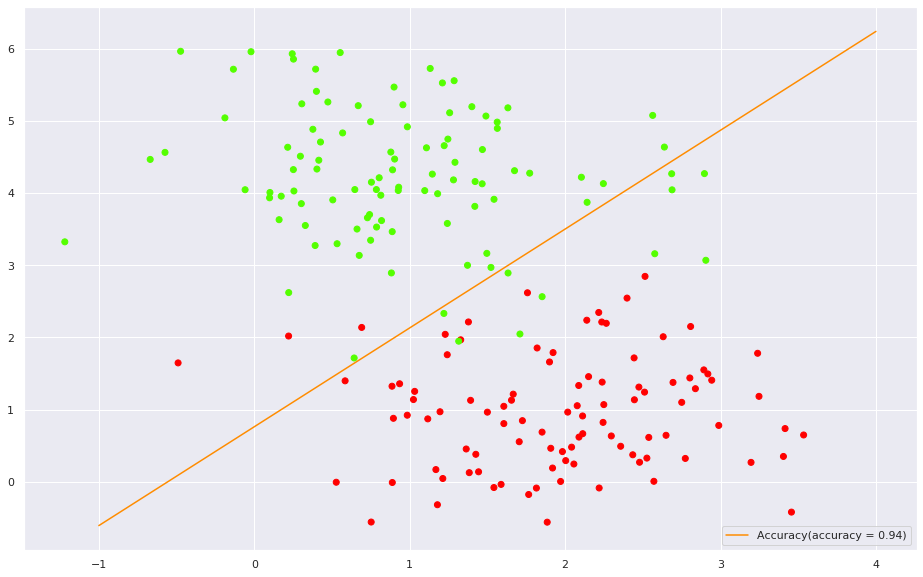

In [5]:
iter_numb=2500
best_acc, best_w=PocketPerceptron(X_train_, y_train, iter_numb)
plt.figure(figsize=(16, 10))
plt.scatter(X_test[:,0],X_test[:,1], c=y_test,cmap='prism_r')
predictions=np.sign(np.dot(X_test_, best_w))
accuracy=accuracy_score(predictions, y_test)
plt.plot([-1, 4], [line(-1, best_w[2][0], best_w[0][0], best_w[1][0]), line(4, best_w[2][0], best_w[0][0], best_w[1][0])], color='darkorange', label='Accuracy(accuracy = %0.2f)' % accuracy)
plt.legend(loc="lower right")